### 아래 주어진 MNIST 데이터셋 X을 기반으로 Autoencoder와 PCA(Principal Component Analysis)를 조건에 맞게 프로그래밍하고 하위 문제에 답하시오

- 조건 :
1. Autoencoder :
   - Autoencoder는 Encoder와 Decoder의 은닉층이 1개씩 있고 은닉층의 노드는 512차원을 사용
   - Autoencoder의 Encoder를 통해 매핑되는 잠재차원은 2차원을 사용(이 차원에는 활성함수 사용 X)
   - Autoencoder 전체 구조 : [784 512 2 512 784]
   - 각 은닉층의 활성함수는 ReLU 사용
   - 마지막 복원하는 출력층에 Sigmoid 함수 적용
   - 30에폭 학습, 그 외에 설계는 자유
2. PCA 구조 :
   - 분산이 가장 큰 주축 벡터 2개를 사용하여 X 데이터를 투영 후 다시 역변환하여 복원하는 PCA 수행

In [10]:
from tensorflow.keras.datasets import mnist
import numpy as np

# ==========================
# 데이터 로드 및 전처리
(x_train, _), (x_test, _) = mnist.load_data()
X = np.concatenate([x_train, x_test], axis=0)  # (70000, 28, 28)
X = X.astype('float32') / 255.0
X = X.reshape(-1, 28*28)  # (70000, 784)

In [11]:
X.shape

(70000, 784)

#### 3-1번 하위 문제 : Autoencoder와 PCA를 위 조건에 맞게 프로그래밍하세요.

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Autoencoder 구현
# 인코더 구조: 784 -> 512 -> 2
# 디코더 구조: 2 -> 512 -> 784

# 인코더
input_layer = Input(shape=(784,))
encoded = Dense(512, activation='relu')(input_layer)

latent = Dense(2, activation=None)(encoded)  # 2차원 잠재 공간 No activation in latent space

# 디코더
decoded = Dense(512, activation='relu')(latent)
output_layer = Dense(784, activation='sigmoid')(decoded)

# Autoencoder 모델 정의
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mse')
# 학습
autoencoder.fit(X, X, epochs=30, batch_size=256, shuffle=True, verbose=1)

# 인코더 및 디코더 모델 추출
encoder = Model(input_layer, latent)
latent_input = Input(shape=(2,))
decoder_layer = autoencoder.layers[-2](latent_input)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(latent_input, decoder_layer)

# 인코더와 디코더 과정 시각화
X_encoded = encoder.predict(X)
X_decoded = decoder.predict(X_encoded)

Epoch 1/30
274/274 [==============================] - 3s 7ms/step - loss: 0.0667
Epoch 2/30
274/274 [==============================] - 2s 8ms/step - loss: 0.0518
Epoch 3/30
274/274 [==============================] - 2s 7ms/step - loss: 0.0487
Epoch 4/30
274/274 [==============================] - 2s 7ms/step - loss: 0.0467
Epoch 5/30
274/274 [==============================] - 2s 7ms/step - loss: 0.0455
Epoch 6/30
274/274 [==============================] - 2s 7ms/step - loss: 0.0445
Epoch 7/30
274/274 [==============================] - 2s 8ms/step - loss: 0.0437
Epoch 8/30
274/274 [==============================] - 2s 7ms/step - loss: 0.0432
Epoch 9/30
274/274 [==============================] - 2s 7ms/step - loss: 0.0427
Epoch 10/30
274/274 [==============================] - 2s 7ms/step - loss: 0.0423
Epoch 11/30
274/274 [==============================] - 2s 7ms/step - loss: 0.0419
Epoch 12/30
274/274 [==============================] - 2s 7ms/step - loss: 0.0417
Epoch 13/30
274/274 [====

In [25]:
from sklearn.decomposition import PCA

# PCA 구현
# PCA로 2차원으로 변환 후 역변환
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # 2차원으로 축소
X_pca_reconstructed = pca.inverse_transform(X_pca)  # 역변환

#### 3-2번 하위 문제 : Autoencoder와 PCA를 통해 2차원으로 투영된 X 데이터를 scatter plot으로 각각 시각화하세요.

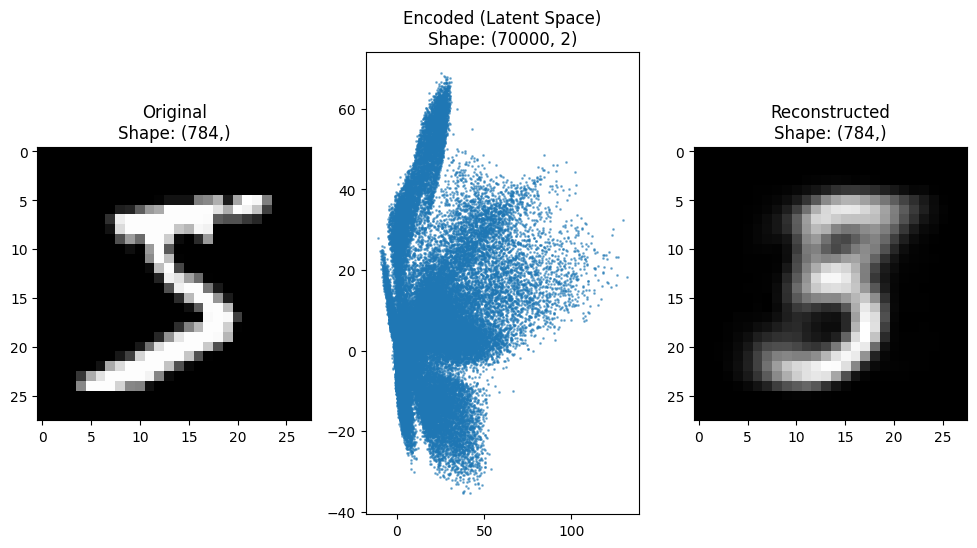

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 원본 데이터
plt.subplot(1, 3, 1)
plt.imshow(X[0].reshape(28, 28), cmap='gray')
plt.title(f"Original\nShape: {X[0].shape}")

# 인코더 출력
plt.subplot(1, 3, 2)
plt.scatter(X_encoded[:, 0], X_encoded[:, 1], s=1, alpha=0.5)
plt.title(f"Encoded (Latent Space)\nShape: {X_encoded.shape}")

# 디코더 출력
plt.subplot(1, 3, 3)
plt.imshow(X_decoded[0].reshape(28, 28), cmap='gray')
plt.title(f"Reconstructed\nShape: {X_decoded[0].shape}")

plt.show()

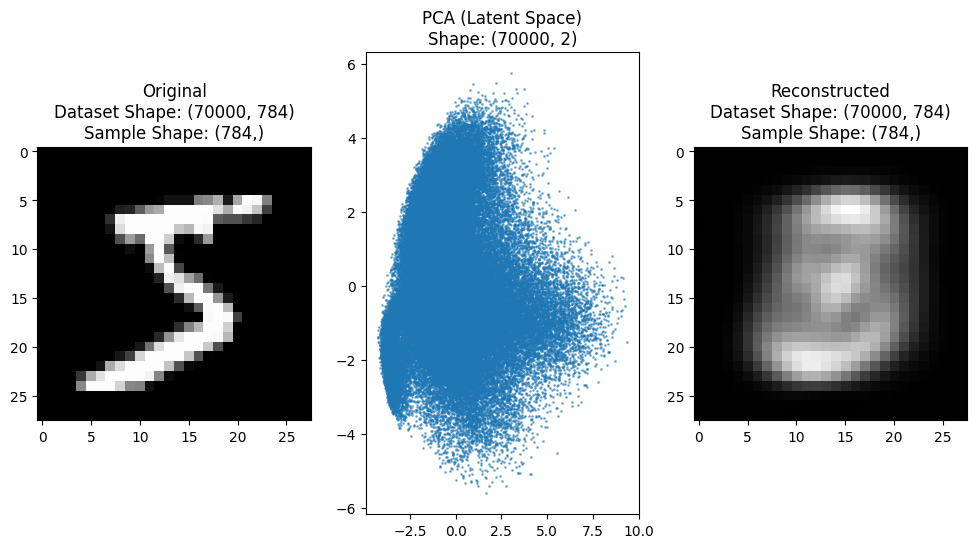

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 원본 데이터
plt.subplot(1, 3, 1)
plt.imshow(X[0].reshape(28, 28), cmap='gray')
plt.title(f"Original\nDataset Shape: {X.shape}\nSample Shape: {X[0].shape}")

# PCA 투영
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=1, alpha=0.5)
plt.title(f"PCA (Latent Space)\nShape: {X_pca.shape}")

# PCA 복원
plt.subplot(1, 3, 3)
plt.imshow(X_pca_reconstructed[0].reshape(28, 28), cmap='gray')
plt.title(f"Reconstructed\nDataset Shape: {X_pca_reconstructed.shape}\nSample Shape: {X_pca_reconstructed[0].shape}")

plt.show()

> Autoencoder는 비선형 활성화 함수(ReLU, Sigmoid)를 사용하여 데이터를 학습하기 때문에, 데이터의 복잡한 패턴과 비선형 관계를 더 잘 표현함.  
PCA는 선형 변환만 사용하므로 데이터의 구조를 단순화하면서 일부 정보를 손실.

## 요약 정리

| 비교 항목         | Autoencoder                         | PCA                                       |
|------------------|--------------------------------------|-------------------------------------------|
| 차원 축소 방식   | 비선형 (신경망 기반)                | 선형 (주성분 분석)                        |
| 잠재 공간 차원   | 2차원 (은닉층 사용)                 | 2차원 (주성분 2개 사용)                  |
| 복원 방식         | Decoder 신경망                      | 역투영 (`inverse_transform`)              |
| 장점              | 비선형 표현 가능, 복잡한 구조 학습 | 계산 간단, 해석 쉬움                      |

#### 3-3번 하위 문제 : X 데이터 중 랜덤으로 10개를 선정하여 Autoencoder와 PCA를 통해 복원한 후 비교하는 그림을 시각화하세요
(X 데이터 10개, Autoencoder로 복원한 데이터 10개, PCA를 통해 복원된 데이터 10개, 총 30개 이미지)

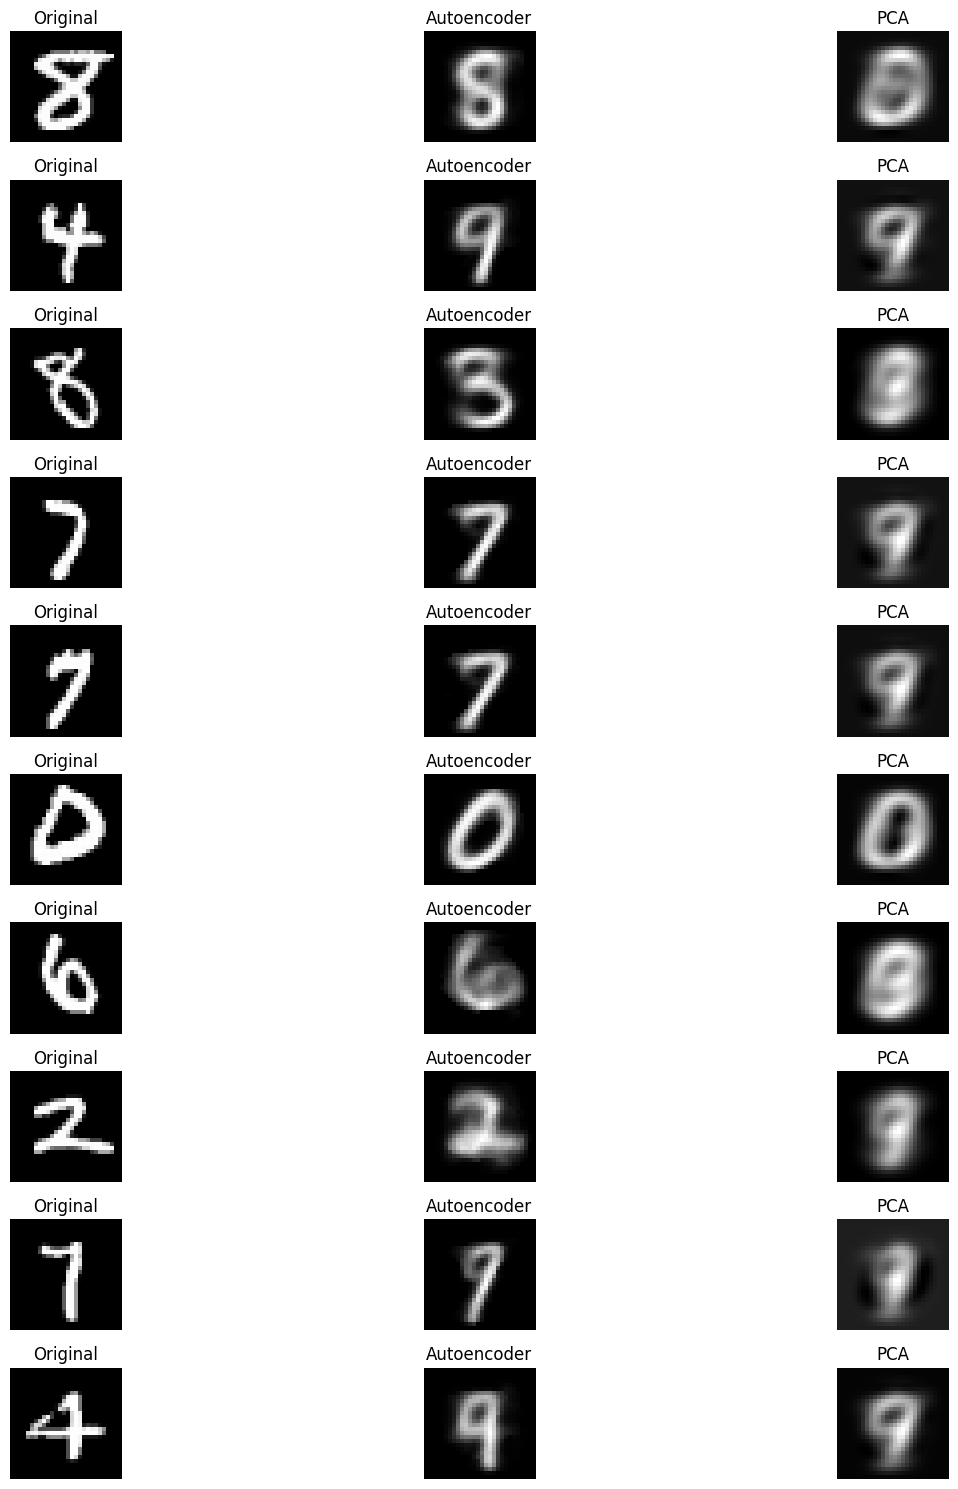

Autoencoder Latent Space Shape: (70000, 2)
PCA Latent Space Shape: (70000, 2)


In [28]:
# 3-3. X 데이터 중 랜덤으로 10개 선택 후 비교
np.random.seed(42)  # 재현 가능한 결과를 위한 시드 설정
random_indices = np.random.choice(X.shape[0], 10, replace=False)
original_images = X[random_indices]
autoencoder_reconstructed = X_decoded[random_indices]
pca_reconstructed = X_pca_reconstructed[random_indices]

plt.figure(figsize=(15, 15))

for i in range(10):
    # 원본 이미지
    plt.subplot(10, 3, i * 3 + 1)
    plt.imshow(original_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title("Original")

    # Autoencoder 복원 이미지
    plt.subplot(10, 3, i * 3 + 2)
    plt.imshow(autoencoder_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title("Autoencoder")

    # PCA 복원 이미지
    plt.subplot(10, 3, i * 3 + 3)
    plt.imshow(pca_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title("PCA")

plt.tight_layout()
plt.show()

# ==========================
# 결과 출력
print("Autoencoder Latent Space Shape:", X_encoded.shape)
print("PCA Latent Space Shape:", X_pca.shape)

#### PCA에서 컴포넌트 증가(30차원으로 축소)

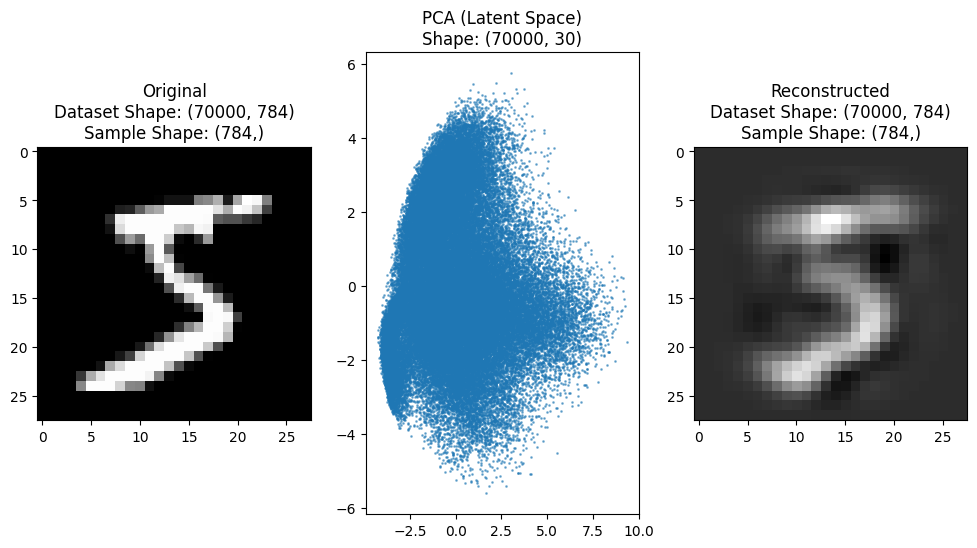

In [29]:
pca30 = PCA(n_components=30)
X_pca30 = pca30.fit_transform(X)  # 30차원으로 축소
X_pca_reconstructed30 = pca30.inverse_transform(X_pca30)  # 역변환
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 원본 데이터
plt.subplot(1, 3, 1)
plt.imshow(X[0].reshape(28, 28), cmap='gray')
plt.title(f"Original\nDataset Shape: {X.shape}\nSample Shape: {X[0].shape}")

# PCA 투영
plt.subplot(1, 3, 2)
plt.scatter(X_pca30[:, 0], X_pca30[:, 1], s=1, alpha=0.5)
plt.title(f"PCA (Latent Space)\nShape: {X_pca30.shape}")

# PCA 복원
plt.subplot(1, 3, 3)
plt.imshow(X_pca_reconstructed30[0].reshape(28, 28), cmap='gray')
plt.title(f"Reconstructed\nDataset Shape: {X_pca_reconstructed30.shape}\nSample Shape: {X_pca_reconstructed30[0].shape}")

plt.show()

**PCA**는 데이터를 분산이 가장 큰 주성분(principal component)부터 차례대로 추출해 사용하는 **선형 기법**임
- **2차원**으로 축소했을 때는 극소수의 주성분만 사용하므로, 원본 데이터의 정보가 많이 손실되어 복원 시 흐릿해질 수 있음.  
- 반면, **30차원**처럼 더 많은 주성분을 사용하면, 원본 데이터의 **중요한 분산**을 훨씬 더 많이 반영할 수 있어 **복원 품질**이 개선됨.

### 왜 주성분 수를 늘리면 복원 품질이 좋아질까?
1. **분산 정보 보존**  
   - PCA에서 상위 \(k\)개 주성분이 보존하는 분산 비율은 \(k\)가 증가할수록 높아짐.  
   - 즉, **더 많은 분산**을 주성분들이 설명하게 되므로, 역변환 시 원본과 가까운 이미지가 나옴.

2. **선형 기법의 한계 완화**  
   - PCA 자체가 **선형적**인 방법이라, MNIST처럼 비선형성이 강한 이미지에서는 근본적 한계가 있지만, 주성분을 늘리면 어느 정도 그 한계를 완화할 수 있음.  
   - 그렇더라도, 여전히 **Autoencoder**처럼 비선형 매핑을 하는 모델에 비해 복원 퀄리티가 떨어질 수 있음.

3. **과도한 차원 증가 시 고려 사항**  
   - 너무 많은 주성분(예: 700개, 784개)에 가까워지면 복원은 사실상 원본과 크게 다르지 않겠지만, 차원 축소(압축)라는 취지를 잃어버리는 문제가 생김.  
   - 따라서, **적절한 차원 수**(예: 30, 50)를 선택해 정보 손실과 복원 품질 간 균형을 맞추는 것이 좋음.

---
##### summary
- 주성분의 개수를 늘린다는 것은 데이터를 **더 많은 축**(더 많은 분산 방향)에 걸쳐 살펴보겠다는 뜻
- MNIST 이미지 복원 시 **더 풍부한 정보**를 담을 수 있어 **복원도가 좋아지는 것**임

#### 3-4번 하위 문제 : Autoencoder와 PCA를 통해 복원된 X 데이터를 원래 X 데이터와의 아래와 같이 정의되는 Mean squared error를 계산하여 출력하세요

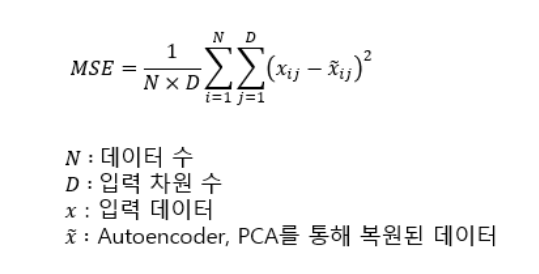

In [30]:
# MSE 계산
 mse_autoencoder = np.mean((X - X_decoded) ** 2)
mse_pca = np.mean((X - X_pca_reconstructed) ** 2)

print(f"MSE (Autoencoder): {mse_autoencoder:.6f}")
print(f"MSE (PCA): {mse_pca:.6f}")

MSE (Autoencoder): 0.038762
MSE (PCA): 0.055910


#### 3-5번 하위 문제 : 정보를 최대한 잃지 않고 차원을 축소하는 목적에서 Autoencoder와 PCA가 수행한 투영에 대해 비교 및 설명하세요

### Autoencoder vs PCA 투영 비교
#### 1. Autoencoder의 투영:

>비선형 변환을 사용해 데이터를 잠재 공간(Latent Space)으로 압축(차원축소) 후 디코더로 차원확대.  
복잡한 패턴과 비선형 관계를 학습하여 데이터를 투영.  
예: MNIST와 같은 복잡한 이미지 데이터에서 중요한 특징(곡선, 형태)을 더 잘 보존.

#### 2. PCA의 투영:

>선형 변환만 사용하여 데이터를 주성분(Principal Components) 방향으로 투영.  
데이터의 분산(변화가 큰 축)을 최대한 보존하려는 방식.  
예: 단순한 데이터에서는 빠르고 효율적으로 주요 정보를 추출.

### 차이점
>Autoencoder: 비선형 변환 덕분에 복잡한 데이터에서 더 많은 정보를 보존.  
PCA: 계산이 빠르고 단순하지만, 선형 변환에 제한되어 있어 일부 정보 손실.

### 결론
>복잡한 데이터(예: 이미지) → Autoencoder가 더 적합.  
단순한 데이터 또는 빠른 계산 필요 → PCA가 효율적.